# Deep Music Genre

In [1]:
import os
import _pickle as pickle

import IPython
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

We already have the preprocessed songs as melspectograms. Let's load them and see one for each genre.

In [2]:
GTZAN_ROOT = 'datasets/genres'
GTZAN_GENRES = [f for f in os.listdir(GTZAN_ROOT)
                if os.path.isdir(os.path.join(GTZAN_ROOT, f))]

In [3]:
with open(os.path.join(GTZAN_ROOT, 'data.pickle'), 'rb') as f:
    X, y = pickle.load(f)
    
print(X.shape)
print(y.shape)

(1000, 128, 647)
(1000, 10)


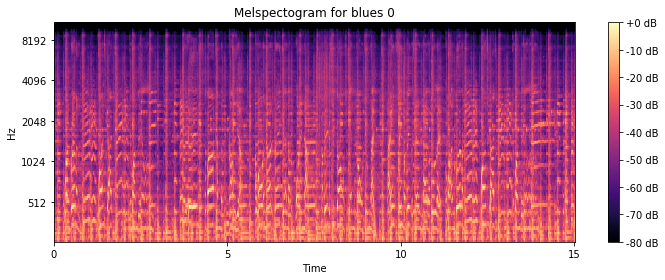

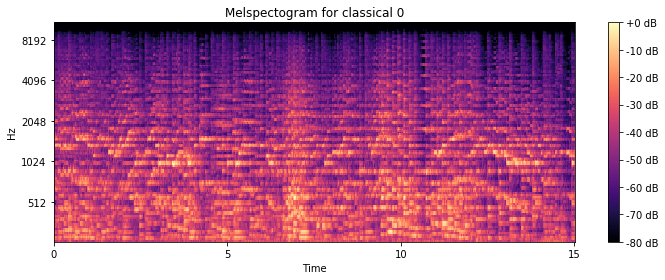

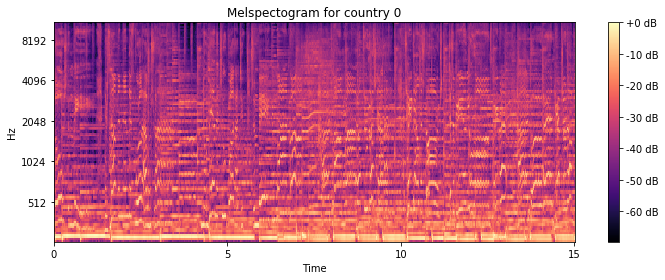

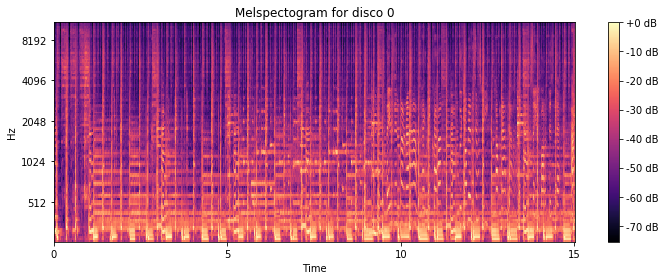

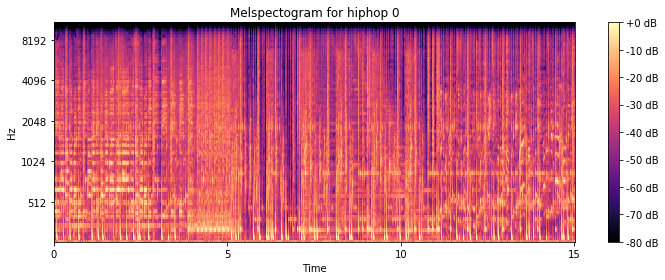

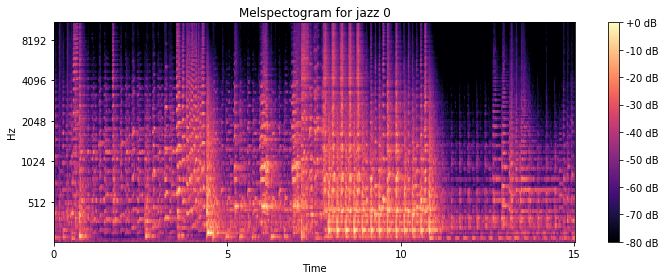

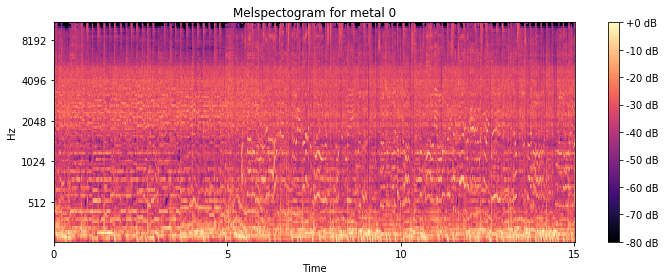

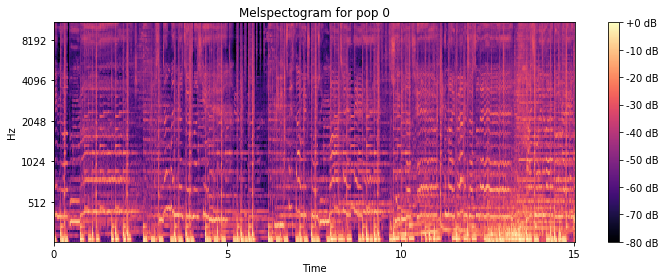

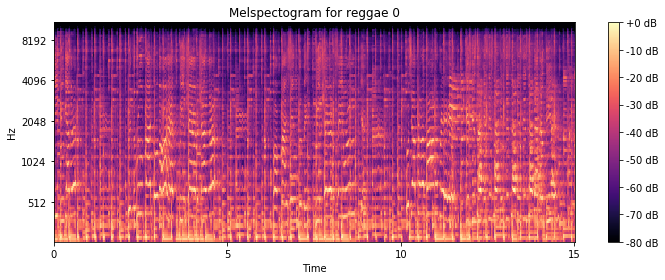

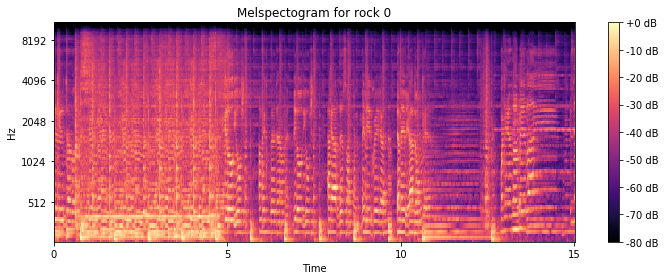

In [4]:
for i, genre in enumerate(GTZAN_GENRES):
    x = X[i*100, :, :]
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(x, y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Melspectogram for ' + genre + ' 0')
    plt.tight_layout()

Now let's center the data around the mean, and split it into test, train and validation sets.